(shooting-method-section)=
# The shooting method

Consider the two-point boundary value problem 

$$y'' = f(t,y), \qquad t \in [a, b], \qquad y(a) = \alpha ,\qquad y(b) = \beta.$$

Since the ODE solvers we use can only be applied to a first-order ODE we need to rewrite the second-order ODE as a system of two first-order ODEs

\begin{align*}
    y_1' &= y_2 ,\\
    y_2' &= f(t, y_1, y_2).
\end{align*}

Since we have let $y_1 = y$ we know that $y_1(a) = \alpha$ from the definition of the boundary value problem but we do not know the value of $y_2(a)$. To overcome this problem we simply guess this value and compute the solutions to the initial value problem and compare the solution of $y_1(b)$ to $\beta$ and then adjust the guess value accordingly. This method is called the **shooting method** because someone shooting at a target will adjust their next shot based where their previous shot landed.

`````{admonition} Example 5.2
:class: seealso
:name: shooting-example-1

Use the Euler method with a step length of $h = 0.2$ and the shooting method to solve the following boundary value problem

\begin{align*}
    y'' - y' - y = 0, \qquad y(0) = 0, \qquad y(1) = 2.
\end{align*}

````{dropdown} Solution

Rewriting this as a system of first-order ODEs gives

\begin{align*}
    y_1' &= y_2, & y_1 (0) &= 1, &&\\
    y_2' &= y_1 +y_2, & y_2 (0) &= s, &&
\end{align*}

where $s$ is a guess of $y'(0)$.

The Euler method solutions using a guess value of $y'(0) = 1$ is tabulated below. 

|  $t$ | $y_1$  | $y_2$  |
|:----:|:------:|:------:|
| 0.00 | 0.0000 | 1.0000 |
| 0.20 | 0.2000 | 1.2000 |
| 0.40 | 0.4400 | 1.4800 |
| 0.60 | 0.7360 | 1.8640 |
| 0.80 | 1.1088 | 2.3840 |
| 1.00 | 1.5856 | 3.0826 |

The numerical solution at the upper boundary is $y_1(5) = 1.5856$ which is less than the boundary value of $y(1) = 2$. Lets try again but with an increased guess value of $y'(0) = 2$.

|  $t$ | $y_1$  | $y_2$  |
|:----:|:------:|:------:|
| 0.00 | 0.0000 | 2.0000 |
| 0.20 | 0.4000 | 2.4000 |
| 0.40 | 0.8800 | 2.9600 |
| 0.60 | 1.4720 | 3.7280 |
| 0.80 | 2.2176 | 4.7680 |
| 1.00 | 3.1712 | 6.1651 |

Here we have $y_1(5) = 3.1712$ which is greater than 2. Lets try again but with a decreased guess value of $y'(0) = 1.5$.

|  $t$ | $y_1$  | $y_2$  |
|:----:|:------:|:------:|
| 0.00 | 0.0000 | 1.5000 |
| 0.20 | 0.3000 | 1.8000 |
| 0.40 | 0.6600 | 2.2200 |
| 0.60 | 1.1040 | 2.7960 |
| 0.80 | 1.6632 | 3.5760 |
| 1.00 | 2.3784 | 4.6238 |

The solutions using the three guess values of $s=1$, $s=2$ and $s=1.5$ are plotted below.

```{glue:} shooting_example_plot_1

```

````
`````


s = 1.00

|  $t$  |  $y_1$  |  $y_2$  |
|:-----:|:-------:|:-------:|
|  0.00 |  0.0000 |  1.0000 |
|  0.20 |  0.2000 |  1.2000 |
|  0.40 |  0.4400 |  1.4800 |
|  0.60 |  0.7360 |  1.8640 |
|  0.80 |  1.1088 |  2.3840 |
|  1.00 |  1.5856 |  3.0826 |

s = 2.00

|  $t$  |  $y_1$  |  $y_2$  |
|:-----:|:-------:|:-------:|
|  0.00 |  0.0000 |  2.0000 |
|  0.20 |  0.4000 |  2.4000 |
|  0.40 |  0.8800 |  2.9600 |
|  0.60 |  1.4720 |  3.7280 |
|  0.80 |  2.2176 |  4.7680 |
|  1.00 |  3.1712 |  6.1651 |

s = 1.50

|  $t$  |  $y_1$  |  $y_2$  |
|:-----:|:-------:|:-------:|
|  0.00 |  0.0000 |  1.5000 |
|  0.20 |  0.3000 |  1.8000 |
|  0.40 |  0.6600 |  2.2200 |
|  0.60 |  1.1040 |  2.7960 |
|  0.80 |  1.6632 |  3.5760 |
|  1.00 |  2.3784 |  4.6238 |


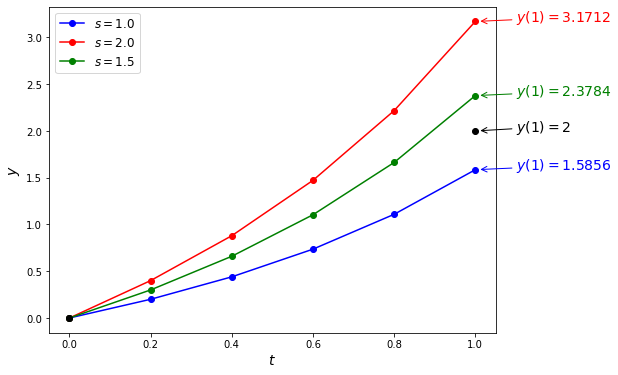

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def f(t, y):
    return np.array([y[1], y[0] + y[1]])


# Define BVP parameters
tspan = [0, 1]  # boundaries of the t domain
bvals = [0, 2]  # boundary values
h = 0.2         # step length
s = [1, 2, 1.5]

# Calculate the solution to the IVP for the different guess values
ysols = []
for i in range(3):
    t, y = euler(f, tspan, [bvals[0], s[i]], h)
    ysols.append(y)
    
# Print table
for y in ysols:
    print(f"\ns = {y[0,1]:0.2f}\n")
    print("|  $t$  |  $y_1$  |  $y_2$  |")
    print("|:-----:|:-------:|:-------:|")
    for n in range(len(t)):
        print(f"| {t[n]:5.2f} | {y[n,0]:7.4f} | {y[n,1]:7.4f} |")
        
    
# Plot solution
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, ysols[0][:,0], "bo-", label="$s = 1.0$")
plt.plot(t, ysols[1][:,0], "ro-", label="$s = 2.0$")
plt.plot(t, ysols[2][:,0], "go-", label="$s = 1.5$")
plt.plot(tspan, bvals, "ko")
plt.annotate(f"$y(1)={bvals[1]}$", xy=(tspan[1], bvals[1]), xytext=(tspan[1]+0.1, bvals[1]), fontsize=14,
             arrowprops=dict(arrowstyle='->', shrinkB=5))
plt.annotate(f"$y(1)={ysols[0][-1,0]}$", xy=(tspan[1], ysols[0][-1,0]), xytext=(tspan[1]+0.1, ysols[0][-1,0]), fontsize=14, color="b",
             arrowprops=dict(arrowstyle='->', shrinkB=5, ec="b"))
plt.annotate(f"$y(1)={ysols[1][-1,0]}$", xy=(tspan[1], ysols[1][-1,0]), xytext=(tspan[1]+0.1, ysols[1][-1,0]), fontsize=14, color="r",
             arrowprops=dict(arrowstyle='->', shrinkB=5, ec="r"))
plt.annotate(f"$y(1)={ysols[2][-1,0]:0.4f}$", xy=(tspan[1], ysols[2][-1,0]), xytext=(tspan[1]+0.1, ysols[2][-1,0]), fontsize=14, color="g",
             arrowprops=dict(arrowstyle='->', shrinkB=5, ec="g"))
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

from myst_nb import glue
glue("shooting_example_plot_1", fig, display=False)

In [2]:
import piplite

# Define BVP parameters
tspan = [0, 1]  # boundaries of the t domain
bvals = [0, 2]  # boundary values
h = 0.2         # step length
s = [1, 2, 1.5]

# Calculate the solution to the IVP for the different guess values
ysols = []
for i in range(3):
    t, y = euler(f, tspan, [bvals[0], s[i]], h)
    ysols.append(y)

ModuleNotFoundError: No module named 'piplite'

(secant-method-section)=
## Improving the guess value using the secant method

In the [example](shooting-example-1) we saw that by adjusting the guess value of $y'(0)$ we obtained solutions at the upper boundary that were closer to the target value at the upper boundary $\beta$. We could continue in this way by increasing or decreasing our guess value halfway towards the previous guess value depending on whether the solution at the upper boundary was higher or lower than the target (this method is known as the [bisection method](https://en.wikipedia.org/wiki/Bisection_method)), however a more efficient approach is to use the [Secant method](https://en.wikipedia.org/wiki/Secant_method). The Secant method is a root finding algorithm that calculates the value of $s$ where $g(s)=0$ for some function $g$

```{math}
:label: secant-method-equation

s_{i+1} = s_i - g(s_i)\frac{s_i - s_{i-1}}{g(s_i) - g(s_{i-1})}.
```

This expression is iterated until two successive values of $s$ are less than some small number, i.e., $|s_i - s_{i-1}| < tol$. Since we want the solution of $y'(a)$ to be equal to the upper boundary value $\beta$ we can define the function

\begin{align*}
    g(s) = y'(a) - y_n.
\end{align*}

Using the Secant method to find the root $g(s) = 0$ will give the value of $y'(0)$.

`````{admonition} Example 5.3
:class: seealso
:name: secant-method-example

Use the secant method to calculate the next guess value $s$ for the solution of the boundary value problem [example 5.2](shooting-example-1) and calculate the solution to the BVP using this guess value.

````{dropdown} Solution

From [example 5.2](shooting-example-1) we have $s_1 = 2$ and $s_2 = 1.5$ which resulted in solutions at the upper boundary of $y_5(s = 1) = 1.5856$, $y_5(s = 2) = 3.1712$ and $y_5(s = 1.5) = 2.3784$. The values of $g(s_1)$ and $g(s_2)$ are

\begin{align*}
        g(s_1) &= 2 - 3.1712 = -1.1712, \\
        g(s_2) &= 2 - 2.3784 = -0.3784, 
\end{align*}

therefore using equation {eq}`secant-method-equation` the next guess value calculated using the secant method is

\begin{align*}
    s_3 &= s_2 - g(s_2) \left( \frac{s_2 - s_1}{g(s_2) - g(s_1)} \right) \\
    &= 1.5 - (-0.3784) \left( \frac{1.5 - 2}{-0.3784 - (-1.1712)} \right) = 1.2614. 
\end{align*}

The solution using a guess value of $s = 1.2614$ are tabulated below.

|  $t$ | $y_1$  | $y_2$  |
|:----:|:------:|:------:|
| 0.00 | 0.0000 | 1.2614 |
| 0.20 | 0.2523 | 1.5136 |
| 0.40 | 0.5550 | 1.8668 |
| 0.60 | 0.9284 | 2.3512 |
| 0.80 | 1.3986 | 3.0071 |
| 1.00 | 2.0000 | 3.8882 |

Here the solution at the upper boundary is $y_5 = 2$ which is equal to $y(5)=2$ correct to (at least) 4 decimal places.

```{glue:} shooting_example_plot_2

```

````
`````

## Python code 

The code below defines a function called `shooting_method()` that calculates the solution to a boundary value problem using the shooting method. 

In [8]:
def shooting_method(solver, f, tspan, bvals, h, tol=1e-6):
    s, so, go = 1, 2, 1
    for _ in range(10):
        t, y = solver(f, tspan, [bvals[0], s], h)
        g = bvals[1] - y[-1,0]
        s, so, go = s - g * (s - so) / (g - go), s, g
        if abs(s - so) < tol:
            break
        
    return t, y

The inputs are:

- `solver` - the name of the solver function, e.g., `euler`, `rk4` etc.;
- `f` - the name of the ODE function;
- `tspan` - an array of two values defining the boundaries of the $t$ domain;
- `bvals` - an array of two values defining the upper and lower boundary values;
- `h` - the step length used in the `solver` function
- `tol` - the convergence tolerance for the Secant method (optional, default is $tol=10^{-6}$).

The variables `s`, `so`, `g` and `go` are the current and old values of the guess value $s$ and function $g(s)$ which are intialised to ensure that at least two iterations of the Secant method are performed. The function calculates the solution to the initial value problem with the initial solution `[bvals[0], s]` and uses the last solution for $y_1$ to calculate the next guess value using the Secant method. The iterations cease when the difference between two successive guess values are less than `tol`


s = 1.2614

|  $t$ | $y_1$  | $y_2$  |
|:----:|:------:|:------:|
| 0.00 | 0.0000 | 1.2614 |
| 0.20 | 0.2523 | 1.5136 |
| 0.40 | 0.5550 | 1.8668 |
| 0.60 | 0.9284 | 2.3512 |
| 0.80 | 1.3986 | 3.0071 |
| 1.00 | 2.0000 | 3.8882 |


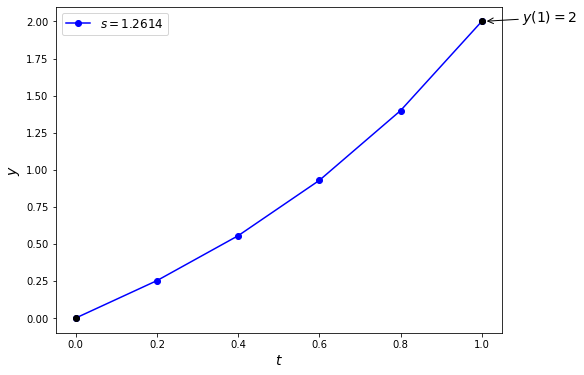

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def f(t, y):
    return np.array([y[1], y[0] + y[1]])


# Define BVP parameters
tspan = [0, 1]  # boundaries of the t domain
bvals = [0, 2]  # boundary values
h = 0.2         # step length
s = [1, 2, 1.5]

# Calculate the solution to the IVP for the different guess values
ysols = []
for i in range(3):
    t, y = euler(f, tspan, [bvals[0], s[i]], h)
    ysols.append(y)
    
# Calculate improved estimate
s.append(s[-1] - (bvals[1] - ysols[-1][-1,0]) * (s[-1] - s[-2]) / ((bvals[1] - ysols[-1][-1,0]) - (bvals[1] - ysols[-2][-1,0])))

# Calculate 
t, y = euler(f, tspan, [bvals[0], s[-1]], h)
ysols.append(y)

# Print table
print(f"\ns = {ysols[-1][0,1]:0.4f}\n")
print("|  $t$ | $y_1$  | $y_2$  |")
print("|:----:|:------:|:------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {ysols[-1][n,0]:6.4f} | {ysols[-1][n,1]:6.4f} |")
          
# Plot solution
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, ysols[3][:,0], "bo-", label=f"$s = {ysols[3][0,1]:0.4f}$")
plt.plot(tspan, bvals, "ko")
plt.annotate(f"$y(1)={bvals[1]}$", xy=(tspan[1], bvals[1]), xytext=(tspan[1]+0.1, bvals[1]), fontsize=14,
             arrowprops=dict(arrowstyle='->', shrinkB=5))
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

from myst_nb import glue
glue("shooting_example_plot_2", fig, display=False)

## A note about accuracy

In [example 5.3](secant-method-example) we iterated the Secant method until convergence and got a very accurate solution for the value of $y(b)$. We must be careful not to forget that this solution was obtained using the Euler method which being only first-order so expect it to be relatively inaccurate for the other values in the domain. 

The exact solution to the boundary value problem used here is

\begin{align*}
    y = \frac{2e^{(1 - \sqrt{5})(t - 1)/2} (e^{\sqrt{5}t} - 1)}{e^{\sqrt{5}} - 1}.
\end{align*}

and the solutions using the Euler method and the second-order Runge-Kutta method have been tabulated below and plotted in {numref}`bvp-euler-rk4-figure`.

| $t$  | Euler  |  RK4   | Exact  | Euler error | RK4 error |
|:----:|:------:|:------:|:------:|:-----------:|:---------:|
| 0.00 | 0.0000 | 0.0000 | 0.0000 |   0.00e+00  | 0.00e+00  |
| 0.20 | 0.2523 | 0.2213 | 0.2213 |   3.10e-02  | 1.41e-05  |
| 0.40 | 0.5550 | 0.5014 | 0.5014 |   5.36e-02  | 2.50e-05  |
| 0.60 | 0.9284 | 0.8659 | 0.8658 |   6.25e-02  | 3.00e-05  |
| 0.80 | 1.3986 | 1.3494 | 1.3494 |   4.92e-02  | 2.42e-05  |
| 1.00 | 2.0000 | 2.0000 | 2.0000 |   0.00e+00  | 0.00e+00  |

```{glue:figure} bvp_euler_rk4_plot
:name: bvp-euler-rk4-figure

Solutions to the boundary value problem $y'' - y' - y = 0$, $t \in [0,1]$, $y(0) = 0$, $y(1) = 2$ using the Euler and RK4 methods with $h=0.2$.
```

So despite the Secant method giving a guess value that gives an accurate solution at the upper boundary, the use of the Euler method does not give an accurate solution across the domain. The solution using the second-order Runge-Kutta method in comparison gives much more accurate solutions over the domain.

| $t$  | Euler  |  RK4   | Exact  | Euler error | RK4 error |
|:----:|:------:|:------:|:------:|:-----------:|:---------:|
| 0.00 | 0.0000 | 0.0000 | 0.0000 |   0.00e+00  | 0.00e+00  |
| 0.20 | 0.2523 | 0.2213 | 0.2213 |   3.10e-02  | 1.41e-05  |
| 0.40 | 0.5550 | 0.5014 | 0.5014 |   5.36e-02  | 2.50e-05  |
| 0.60 | 0.9284 | 0.8659 | 0.8658 |   6.25e-02  | 3.00e-05  |
| 0.80 | 1.3986 | 1.3494 | 1.3494 |   4.92e-02  | 2.42e-05  |
| 1.00 | 2.0000 | 2.0000 | 2.0000 |   0.00e+00  | 0.00e+00  |


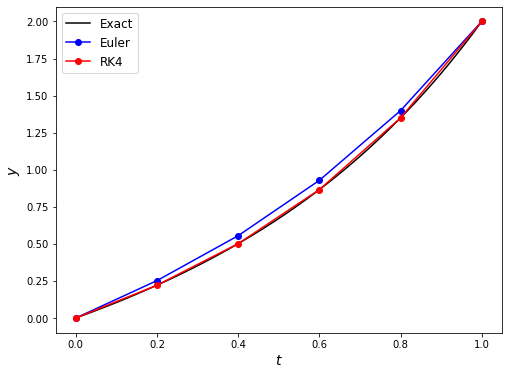

In [4]:
def shooting_method(solver, f, tspan, bvals, h):
    s, so, go = 1, 2, 1
    for i in range(10):
        
        # Solve IVP
        t, y = solver(f, tspan, [bvals[0], s], h)
        
        # Use Secant method to calculate next guess value
        g = y[-1,0] - bvals[1]
        s, so, go = s - g * (s - so) / (g - go), s, g
        
        # Check for convergence
        if abs(s - so) < tol:
            break
    
    return t, y

def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        
    return t, y 


def exact(t):
    return (2 * np.exp((1 - np.sqrt(5)) * (t - 1) / 2) * (np.exp(np.sqrt(5) * t) -1)) / (np.exp(np.sqrt(5)) - 1)
    

tol = 1e-6
t, y = shooting_method(euler, f, tspan, bvals, h)
ysols = [y]
t, y = shooting_method(rk4, f, tspan, bvals, h)
ysols.append(y)

# Output table
print("| $t$  | Euler  |  RK4   | Exact  | Euler error | RK4 error |")
print("|:----:|:------:|:------:|:------:|:-----------:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {ysols[0][n,0]:6.4f} | {ysols[1][n,0]:6.4f} | {exact(t[n]):6.4f} |   {abs(ysols[0][n,0] - exact(t[n])):6.2e}  | {abs(ysols[1][n,0] - exact(t[n])):6.2e}  |")

# Plot solution
t_exact = np.linspace(0, tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k-", label="Exact")
plt.plot(t, ysols[0][:,0], "bo-", label=f"Euler")
plt.plot(t, ysols[1][:,0], "ro-", label=f"RK4")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

from myst_nb import glue
glue("bvp_euler_rk4_plot", fig, display=False)